<a href="https://colab.research.google.com/github/gabriellaaileen/ADL/blob/main/UTS_ADL_XNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os, sys
import numpy as np
import h5py
import matplotlib.pyplot as plt

#import Keras sub-modules
from keras.models import Model #functional API for Keras (best for greater flexibility)
from keras.layers import Input, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense #'main' layers
from keras.layers import BatchNormalization, Dropout #regulartisation layers
from keras.layers import Activation
from keras.optimizers import * #import all optimisers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger #callbacks for model performance analysis
from keras.metrics import categorical_accuracy #metrics for model performance
from keras import backend as K #gives backend functionality
from keras import losses #imports pre-defined loss functions
from keras.models import load_model #allows pre-trained models to be called back

In [3]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1Wel_XsyE7HcEq0TkZWI61GABO4jOtj9C',
                                    dest_path='./dataset.hdf5')
gdd.download_file_from_google_drive(file_id='1cePD5E-T9mr5W0xPGuzEnUt8Glpvn23U',
                                    dest_path='./model.h5')

In [4]:
hdf5_path = "./dataset.hdf5" ## this is our h5 file containing training and testing data
dataset = h5py.File(hdf5_path , 'r')

classes = 3
test_images = dataset['test_img'][:]
print(test_images.shape)
no_images, height, width, channels = test_images.shape


print(dataset['test_label'][:].shape)
test_labels =dataset['test_label'][:].reshape(-1,height*width, classes )
print(test_labels.shape)
dataset.close()

(22, 200, 200, 1)
(22, 40000, 3)
(22, 40000, 3)


In [12]:
model = load_model("./model.h5")

**Modifikasi Program**

* Mengubah dari batch ukuran 1 menjadi custom (ukuran batch tidak boleh lebih dari 22)

masukkan batch size: 5
Berikut adalah data test yang digunakan: 


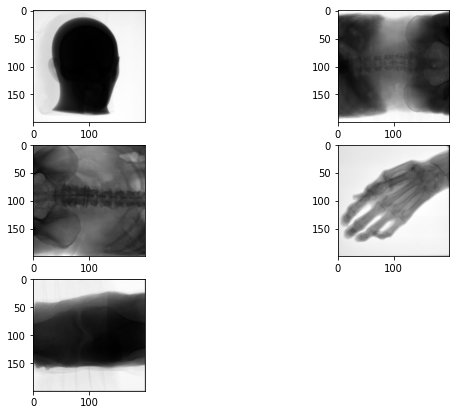

In [10]:
batch_size=int(input("masukkan batch size: "))
if batch_size > 22:
  print("maaf, ukuran batch melebihi ukuran dataset")
else:
  fig = plt.figure(figsize=(10, 7))
  print("Berikut adalah data test yang digunakan: ")
  for i in range(batch_size):
    fig.add_subplot(3, 2, i+1)
    plt.imshow(test_images[i].reshape(200,200), cmap='gray')

In [5]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 200, 200, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 200, 200, 64  256        ['conv2d_1[0][0]']               
 rmalization)                   )                                                           

* Menampilkan hasil prediksi dalam batch custom

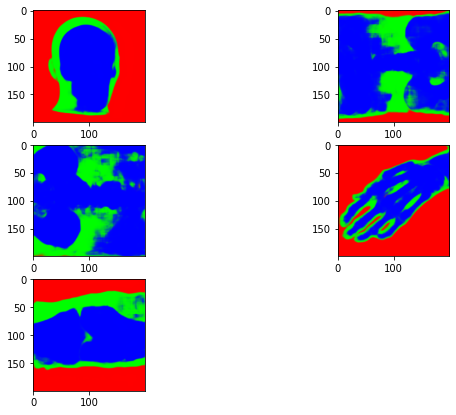

In [13]:
testing_image=np.empty([batch_size,200,200,1])
for i in range(batch_size):
  testing_image[i]=test_images[i]
testing_image=testing_image.reshape((batch_size,200,200,1))
  
prediction2 = model.predict(testing_image)
prediction2 = prediction2.reshape((batch_size,200,200,3))

fig = plt.figure(figsize=(10, 7))
for i in range(batch_size):
   fig.add_subplot(3, 2, i+1)
   plt.imshow(prediction2[i])